#1 Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the feature-selected data
df = pd.read_csv('../data/final_feature_dataset.csv')

# Separate features (X) and the actual target (y) for later comparison
X = df.drop('target', axis=1)
y = df['target']

print("Data loaded successfully.")

Data loaded successfully.


#2 Method 1 - K-Means Clustering

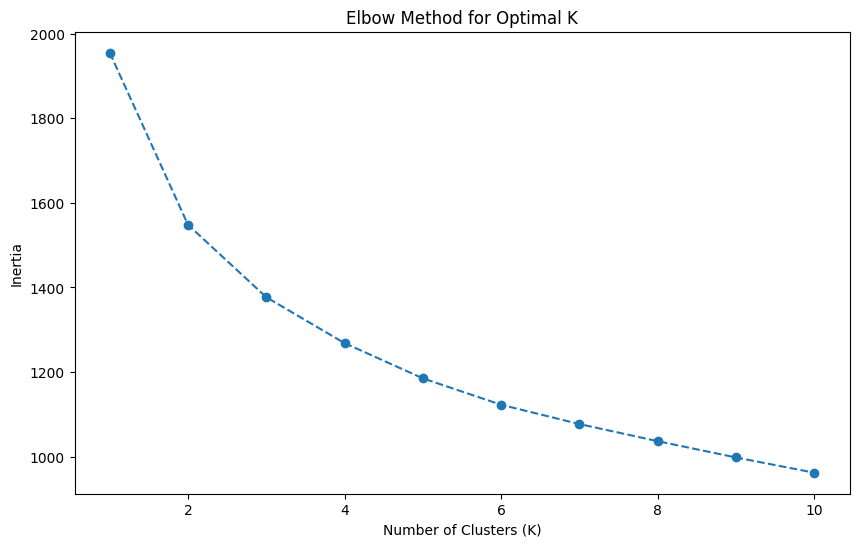

In [2]:
# Calculate inertia for a range of K values
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#3 Applying K-Means and Visualizing Clusters

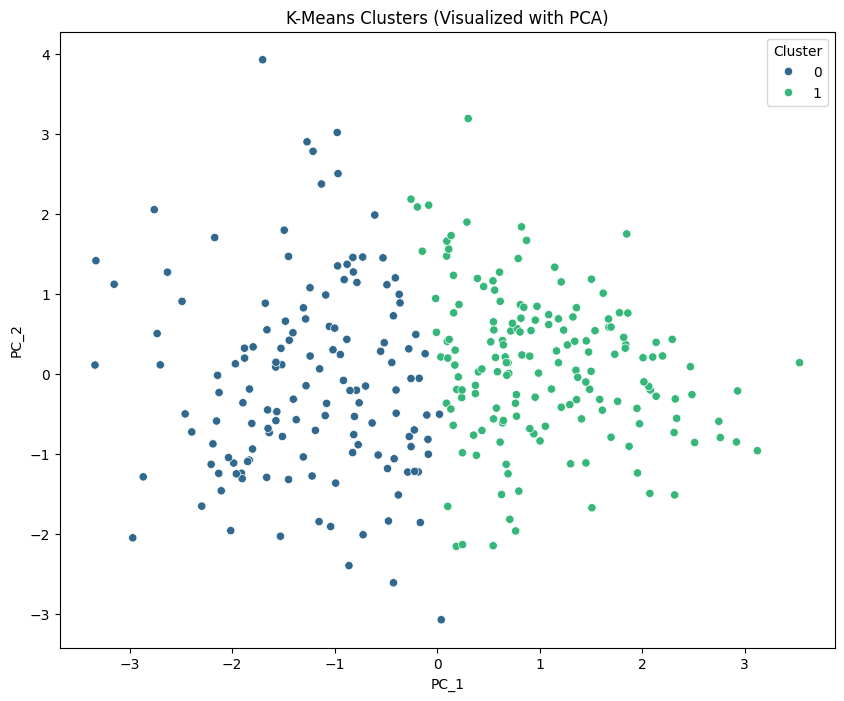

In [3]:
# Apply K-Means with the optimal K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC_1', 'PC_2'])
pca_df['Cluster'] = kmeans_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC_1', y='PC_2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clusters (Visualized with PCA)')
plt.show()

#4 Method 2 - Hierarchical Clustering

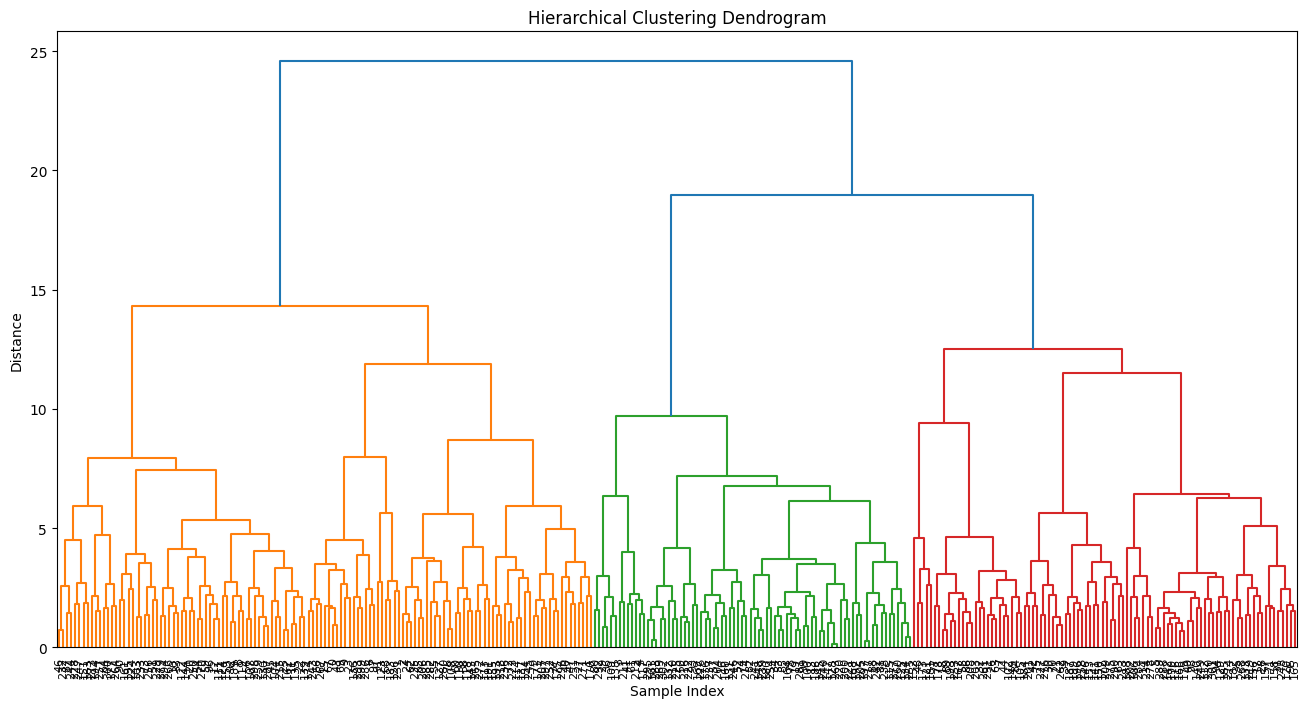

In [4]:
# Generate the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

#5 Comparing Clusters to Actual Labels

--- Comparison of K-Means Clusters and Actual Labels ---
col_0    0    1
target         
0       40  124
1       29   26
2       30    6
3       28    7
4       12    1


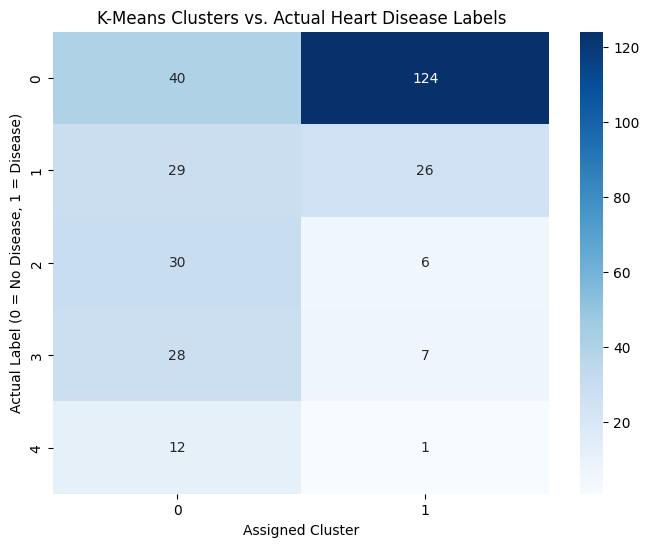

In [5]:
# Create a cross-tabulation (contingency table)
ct = pd.crosstab(y, kmeans_labels)

print("--- Comparison of K-Means Clusters and Actual Labels ---")
print(ct)

# Optional: Visualize the crosstab as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('K-Means Clusters vs. Actual Heart Disease Labels')
plt.xlabel('Assigned Cluster')
plt.ylabel('Actual Label (0 = No Disease, 1 = Disease)')
plt.show()